In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
books = pd.read_csv('BX-Books.csv',encoding='latin-1')
books.head()

C:\Users\LENOVO\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,isbn,book_title,book_author,year_of_publication,publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [3]:
users = pd.read_csv('BX-Users.csv', encoding='latin-1')
users.head()

C:\Users\LENOVO\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,user_id,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [4]:
ratings = pd.read_csv('BX-Book-Ratings.csv', encoding='latin-1')
ratings.head()

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [5]:
books.shape,users.shape,ratings.shape

((271379, 5), (278859, 3), (1048575, 3))

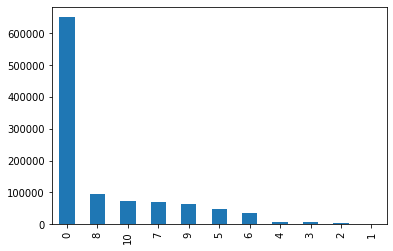

In [6]:
ratings.rating.value_counts().plot(kind='bar');

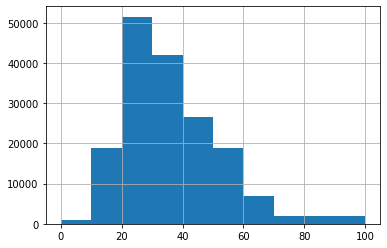

In [7]:
users.Age.hist(bins=[0,10,20,30,40,50,60,70,100]).plot(kind='bar');

In [8]:
ratings.head()

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [9]:
# number of users rated the book
rating_count = pd.DataFrame(ratings.groupby('isbn')['rating'].count())

In [10]:
rating_count

,rating
isbn,
904492401X,1
#069580216X,1
#6612432,1
(THEWINDMILLP,1
)416195113,1
)440206529,1
)452273056,1
)553267833,1
)959326839,1


In [11]:
rating_count = rating_count.sort_values('rating', ascending=False)
rating_count

,rating
isbn,
971880107,2264
316666343,1164
385504209,813
312195516,668
60928336,662
044023722X,595
679781587,578
142001740,555
067976402X,552


In [12]:
books_rating_merged = pd.merge(rating_count,books,on='isbn')
books_rating_merged.head()

,isbn,rating,book_title,book_author,year_of_publication,publisher
0,971880107,2264,Wild Animus,Rich Shapero,2004,Too Far
1,316666343,1164,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
2,385504209,813,The Da Vinci Code,Dan Brown,2003,Doubleday
3,312195516,668,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
4,60928336,662,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial


In [13]:
#Average rating of each book 
ratings_mean = pd.DataFrame(ratings.groupby('isbn')['rating'].mean())
ratings_mean['rating_count'] = pd.DataFrame(ratings.groupby('isbn')['rating'].count())
ratings_mean.sort_values('rating_count', ascending = False).head()

,rating,rating_count
isbn,,
971880107,1.032244,2264
316666343,4.457045,1164
385504209,4.691267,813
312195516,4.326347,668
60928336,3.462236,662


In [14]:
#select ratings of users who have rated more than 200 ratings

counts_user = ratings['user_id'].value_counts()
ratings = ratings[ratings['user_id'].isin(counts_user[counts_user >= 200].index)]

In [15]:
counts_books = ratings['rating'].value_counts()
ratings = ratings[ratings['rating'].isin(counts_books[counts_books >= 100].index)]
# counts_books = counts_books[counts_books >= 100]

In [16]:
ratings

,user_id,isbn,rating
1456,277427,002542730X,10
1457,277427,26217457,0
1458,277427,003008685X,8
1459,277427,30615321,0
1460,277427,60002050,0
1461,277427,60006641,10
1462,277427,60159685,0
1463,277427,60177721,0
1464,277427,60192704,0
1465,277427,60542128,7


In [17]:
ratings = ratings.drop_duplicates()

In [18]:
ratings_pivot = ratings.reset_index().pivot_table(index='user_id',columns='isbn').rating

In [19]:
ratings_pivot.fillna(0,inplace=True)
ratings_pivot

isbn,904492401X,*0515128325,0,0 00 612183 7,0 00 614494 2,0 7336 1053 6,0 907 062 008,0.330241664,000104687X,000104799X,...,THEFLYINGACE,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107
user_id,,,,,,,,,,,,,,,,,,,,,
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Recommendation
ratings_pivot[ratings_pivot.index == 254]

isbn,904492401X,*0515128325,0,0 00 612183 7,0 00 614494 2,0 7336 1053 6,0 907 062 008,0.330241664,000104687X,000104799X,...,THEFLYINGACE,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107
user_id,,,,,,,,,,,,,,,,,,,,,
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
from sklearn.metrics.pairwise import cosine_similarity
import operator
def similar_users(user_id, matrix, k=3):
    # create a df of just the current user
    user = matrix[matrix.index == user_id]
    
    # and a df of all other users
    other_users = matrix[matrix.index != user_id]
    
    # calc cosine similarity between user and each other user
    similarities = cosine_similarity(user,other_users)[0].tolist()
    
    # create list of indices of these users
    indices = other_users.index.tolist()
    
    # create key/values pairs of user index and their similarity
    index_similarity = dict(zip(indices, similarities))
    
    # sort by similarity
    index_similarity_sorted = sorted(index_similarity.items(), key=operator.itemgetter(1))
    index_similarity_sorted.reverse()
    
    # grab k users off the top
    top_users_similarities = index_similarity_sorted[:k]
    users = [u[0] for u in top_users_similarities]
    
    return users

In [22]:
similar_user_indices = similar_users(254, ratings_pivot)
print(similar_user_indices)

[175003, 226965, 170513]


In [23]:
# Recommendation
ratings_pivot[ratings_pivot.index == 175003]

isbn,904492401X,*0515128325,0,0 00 612183 7,0 00 614494 2,0 7336 1053 6,0 907 062 008,0.330241664,000104687X,000104799X,...,THEFLYINGACE,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107
user_id,,,,,,,,,,,,,,,,,,,,,
175003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
def recommend_item(user_index, similar_user_indices, matrix, items=5):
    
    # load vectors for similar users
    similar_users = matrix[matrix.index.isin(similar_user_indices)]
    # calc avg ratings across the 3 similar users
    similar_users = similar_users.mean(axis=0)
    # convert to dataframe so its easy to sort and filter
    similar_users_df = pd.DataFrame(similar_users, columns=['mean'])
    
    
    # load vector for the current user
    user_df = matrix[matrix.index == user_index]
    # transpose it so its easier to filter
    user_df_transposed = user_df.transpose()
    # rename the column as 'rating'
    user_df_transposed.rename(columns = {user_index: 'rating'}, inplace = True)
    # remove any rows without a 0 value. Books not read yet
    user_df_transposed = user_df_transposed[user_df_transposed['rating']==0]
    # generate a list of Books the user has not read
    books_unseen = user_df_transposed.index.tolist()
    
    # filter avg ratings of similar users for only Books the current user has not read
    similar_users_df_filtered = similar_users_df[similar_users_df.index.isin(books_unseen)]
    # order the dataframe
    similar_users_df_ordered = similar_users_df.sort_values(by=['mean'], ascending=False)
    # grab the top n books   
    top_n_books = similar_users_df_ordered.head(items)
    top_n_books_indices = top_n_books.index.tolist()
    # lookup these books in the other dataframe to find names
    book_information = books_rating_merged[books_rating_merged['isbn'].isin(top_n_books_indices)]
    
    return book_information #items

In [25]:
recommend_item(254, similar_user_indices, ratings_pivot)

,isbn,rating,book_title,book_author,year_of_publication,publisher
11,059035342X,515,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books
66,043935806X,305,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic
202,439139597,177,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic
214,439136350,173,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999,Scholastic
293,439064864,152,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,1999,Scholastic
